In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tech_ind as ti
import risk_management_utils as erk

In [2]:
import importlib
importlib.reload(ti)

<module 'tech_ind' from '/Users/arnavbhattacharya/Desktop/Projects/Finance/Algorithmic trading/tech_ind.py'>

In [3]:
stocks=["ONGC.NS"]
ohclv_data={}
for ticker in stocks:
    temp=yf.download(ticker,period='2mo',interval='1d')
    temp.dropna(how='any',inplace=True)
    ohclv_data[ticker]=temp   

[*********************100%***********************]  1 of 1 completed


In [4]:
nse=ohclv_data[stocks[0]]
nse["Price_Change"]=nse["Adj Close"].diff()
nse['Year'] = nse.index.year
nse

,Open,High,Low,Close,Adj Close,Volume,Price_Change,Year
Date,,,,,,,,
2023-05-08,160.300003,165.350006,160.000000,165.000000,165.000000,9699470,NaN,2023
2023-05-09,165.000000,166.500000,164.399994,165.250000,165.250000,7600834,0.250000,2023
2023-05-10,165.250000,167.649994,165.000000,166.949997,166.949997,10901429,1.699997,2023
2023-05-11,166.100006,168.649994,166.100006,167.050003,167.050003,7877677,0.100006,2023
2023-05-12,168.149994,169.000000,165.000000,165.500000,165.500000,16373574,-1.550003,2023
2023-05-15,165.500000,166.600006,164.399994,165.600006,165.600006,8559162,0.100006,2023
2023-05-16,168.300003,168.500000,166.750000,168.000000,168.000000,12249266,2.399994,2023
2023-05-17,168.000000,168.000000,166.100006,167.250000,167.250000,7360259,-0.750000,2023
2023-05-18,167.500000,168.449997,166.000000,166.350006,166.350006,7433090,-0.899994,2023


### determining total bullish bearish and flat days

In [5]:
# Calculate market condition for each trading year
nse['Year'] = nse.index.year
nse['Market_Condition'] = '##'
nse.loc[nse['Price_Change'] > 0, 'Market_Condition'] = 'Bullish'
nse.loc[nse['Price_Change'] < 0, 'Market_Condition'] = 'Bearish'
nse["Strength"]= 'Weak'
nse.loc[np.abs(nse["Price_Change"]) > 90, "Strength"] = "Strong"
nse.loc[np.abs(nse["Price_Change"]) < 65, "Strength"] = "Flat"

# Count the number of bullish, bearish, and flat market days for each trading year
market_conditions = nse.groupby('Year')['Market_Condition'].value_counts().unstack(fill_value=0)

# Print the market condition count for each trading year
for year, row in market_conditions.iterrows():
    print("Year:", year)
    print("Bullish Days:", row['Bullish'])
    print("Bearish Days:", row['Bearish'])
    print("----------")

returns=row['Bullish']*6.45 + row['Bearish']*2.5

months=2
print(returns,"% return over ",months," months")
nse

Year: 2023
Bullish Days: 21
Bearish Days: 20
----------
185.45000000000002 % return over  2  months


,Open,High,Low,Close,Adj Close,Volume,Price_Change,Year,Market_Condition,Strength
Date,,,,,,,,,,
2023-05-08,160.300003,165.350006,160.000000,165.000000,165.000000,9699470,NaN,2023,##,Weak
2023-05-09,165.000000,166.500000,164.399994,165.250000,165.250000,7600834,0.250000,2023,Bullish,Flat
2023-05-10,165.250000,167.649994,165.000000,166.949997,166.949997,10901429,1.699997,2023,Bullish,Flat
2023-05-11,166.100006,168.649994,166.100006,167.050003,167.050003,7877677,0.100006,2023,Bullish,Flat
2023-05-12,168.149994,169.000000,165.000000,165.500000,165.500000,16373574,-1.550003,2023,Bearish,Flat
2023-05-15,165.500000,166.600006,164.399994,165.600006,165.600006,8559162,0.100006,2023,Bullish,Flat
2023-05-16,168.300003,168.500000,166.750000,168.000000,168.000000,12249266,2.399994,2023,Bullish,Flat
2023-05-17,168.000000,168.000000,166.100006,167.250000,167.250000,7360259,-0.750000,2023,Bearish,Flat
2023-05-18,167.500000,168.449997,166.000000,166.350006,166.350006,7433090,-0.899994,2023,Bearish,Flat


In [89]:
def correlationTrend(t):
    a=ohclv_data[t]["Close"]
    b=ohclv_data["^NSEI"]["Close"]
    corr=pd.concat([a,b],axis=1)
    corr.dropna(axis=0,inplace=True)
    plt.plot(corr.iloc[:,:1],corr.iloc[:,-1:],".")
    plt.xlabel(t)
    plt.ylabel("NSE")
    plt.show()

In [104]:
for ticker in stocks:
    ohclv_data[ticker].dropna(axis=1)
ohclv_data

{'^NSEI':                                    Open          High           Low  \
 Datetime                                                              
 2023-06-23 09:15:00+05:30  18741.849609  18751.199219  18712.849609   
 2023-06-23 09:16:00+05:30  18722.699219  18725.900391  18714.849609   
 2023-06-23 09:17:00+05:30  18715.300781  18715.300781  18699.349609   
 2023-06-23 09:18:00+05:30  18700.849609  18706.650391  18699.599609   
 2023-06-23 09:19:00+05:30  18702.199219  18705.000000  18700.300781   
 ...                                 ...           ...           ...   
 2023-06-27 15:25:00+05:30  18815.099609  18819.199219  18815.099609   
 2023-06-27 15:26:00+05:30  18817.199219  18818.349609  18814.500000   
 2023-06-27 15:27:00+05:30  18816.349609  18819.050781  18814.300781   
 2023-06-27 15:28:00+05:30  18818.349609  18822.699219  18814.750000   
 2023-06-27 15:29:00+05:30  18817.199219  18823.500000  18816.550781   
 
                                   Close     Adj Clos

# correlation plot of a stock wrt sensex

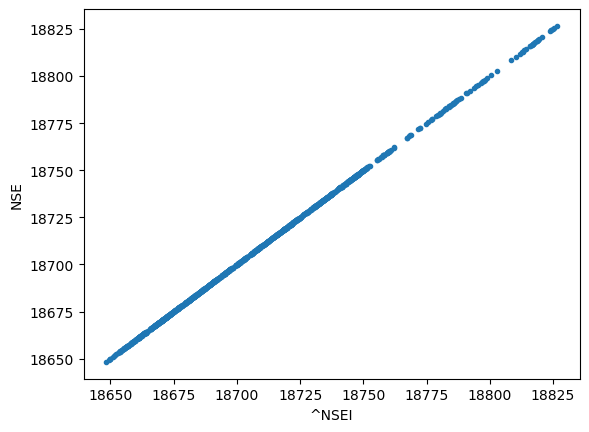

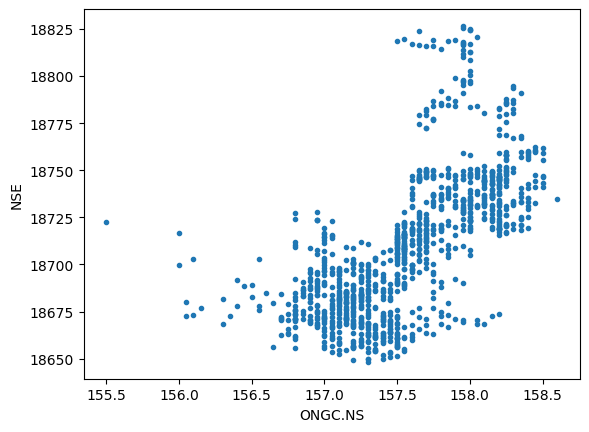

In [91]:
for ticker in stocks:
    correlationTrend(ticker)

In [92]:
for ticker in stocks:
    print("CAGR for {} = {}".format(ticker,100*ti.CAGR(ohclv_data[ticker])))


CAGR for ^NSEI = 0.114927483336702
CAGR for ONGC.NS = 0.33655437066719696


In [93]:
for ticker in stocks:
    print("annual volatility of {} is {}".format(ticker,ti.annual_vol(ohclv_data[ticker])))

annual volatility of ^NSEI is 0.0035045435603993404
annual volatility of ONGC.NS is 0.010618062425134259


In [94]:
for ticker in stocks:
    print("sharpe and sortino ratio of {} is {} and {}".format(ticker,ti.sharpe_ratio(ohclv_data[ticker]),ti.sortino_ratio(ohclv_data[ticker])))

sharpe and sortino ratio of ^NSEI is -8.232377389352655 and -12.403299147296273
sharpe and sortino ratio of ONGC.NS is -2.5084102190133106 and -3.7225678562506164


In [95]:
def max_drawdown(data):
    """
      takes a time series of asset return 
      Computes and returns wealth index, previous peaks and max drawdown
      """
    df=data.copy()
    df['returns']=df["Close"].pct_change()
    df["cumu_return"] = (1+df['returns']).cumprod()
    df["cum_roll_max"]=df["cumu_return"].cummax()
    df["drawdown"] = df["cum_roll_max"]-df["cumu_return"]
    df['drawdown']=df['drawdown']/df['cum_roll_max']
    return df["drawdown"].max()

def calmar_ratio(data):
    "computes the calmar ratio"
    df=data.copy()
    return ti.CAGR(data)/max_drawdown(data)

In [96]:
for ticker in stocks:
    print("max drawdown and calmar ratio of {} is {} and {} ".format(ticker,max_drawdown(ohclv_data[ticker]),calmar_ratio(ohclv_data[ticker])))

max drawdown and calmar ratio of ^NSEI is 0.005288636141541946 and 0.21731024835297882 
max drawdown and calmar ratio of ONGC.NS is 0.012341752836976212 and 0.2726957630028624 


In [108]:
def VROC(data, n=14):
    """Computes the Volume Rate of Change of a stock for a particular window size."""
    df = data.copy()
    df["VROC"] = (df["Volume"] - df["Volume"].shift(n)) / df["Volume"].shift(n) * 100
    return df["VROC"]

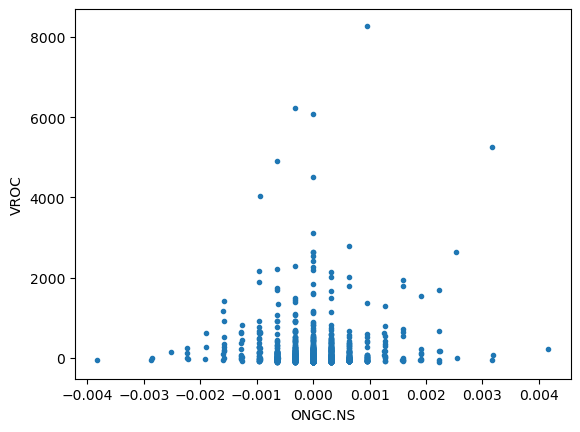

AttributeError: 'str' object has no attribute 'copy'

In [134]:
a=karur["Close"].pct_change()
b=VROC(karur,10)
corr=pd.concat([a,b],axis=1)
corr.dropna(axis=0,inplace=True)
plt.plot(corr.iloc[:,:1],corr.iloc[:,-1:],".")
plt.xlabel("ONGC.NS")
plt.ylabel("VROC")
plt.show()
VcorrelationTrend("ONGC.NS")

### algorithmic trading setup

In [9]:
ohclv_data["ONGC.NS"]
karur=ohclv_data["ONGC.NS"].copy()
ti.RSI(karur,8)
# karur

Date
2023-05-08          NaN
2023-05-09          NaN
2023-05-10          NaN
2023-05-11          NaN
2023-05-12          NaN
2023-05-15          NaN
2023-05-16          NaN
2023-05-17    64.287428
2023-05-18    53.333023
2023-05-19    40.595953
2023-05-22    47.512019
2023-05-23    42.648115
2023-05-24    53.887580
2023-05-25    51.577230
2023-05-26    35.793041
2023-05-29    20.590137
2023-05-30    20.279286
2023-05-31    13.943687
2023-06-01    12.528137
2023-06-02    20.295976
2023-06-05    25.346969
2023-06-06    21.461144
2023-06-07    23.002992
2023-06-08    38.520021
2023-06-09    32.386839
2023-06-12    37.319089
2023-06-13    41.007630
2023-06-14    52.677357
2023-06-15    51.616453
2023-06-16    48.024274
2023-06-19    52.658587
2023-06-20    49.211021
2023-06-21    63.756353
2023-06-22    55.991132
2023-06-23    45.585012
2023-06-26    45.585012
2023-06-27    51.087374
2023-06-28    51.087374
2023-06-30    63.514510
2023-07-03    72.108883
2023-07-04    61.316029
2023-07-05 

#### RSI (30,70)

In [74]:
karur


,Open,High,Low,Close,Adj Close,Volume,RSI,Signal,Position,Actual_Return,Strategy_Return,Cumulative_Strategy_Return,Final_Position,Equity
Datetime,,,,,,,,,,,,,,
2023-06-23 09:15:00+05:30,123.250000,123.349998,122.699997,122.900002,122.900002,17554.0,NaN,0,0,NaN,NaN,NaN,0,0.0
2023-06-23 09:16:00+05:30,122.900002,122.900002,122.349998,122.900002,122.900002,1385.0,NaN,0,0,0.000000,0.0,1.0,0,0.0
2023-06-23 09:17:00+05:30,122.650002,122.650002,122.500000,122.500000,122.500000,398.0,NaN,0,0,-0.003255,-0.0,1.0,0,0.0
2023-06-23 09:18:00+05:30,122.449997,122.550003,122.150002,122.150002,122.150002,1607.0,NaN,0,0,-0.002857,-0.0,1.0,0,0.0
2023-06-23 09:19:00+05:30,122.050003,122.199997,121.750000,121.800003,121.800003,1786.0,NaN,0,0,-0.002865,-0.0,1.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,NaN,NaN,NaN,NaN,NaN,NaN,40.033771,0,0,0.000000,0.0,1.0,0,NaN
721,NaN,NaN,NaN,NaN,NaN,NaN,40.033771,0,0,0.000000,0.0,1.0,0,NaN
758,NaN,NaN,NaN,NaN,NaN,NaN,40.033771,0,0,0.000000,0.0,1.0,0,NaN
